<a href="https://colab.research.google.com/github/Meyuki-hell/UWnew/blob/main/Problem_statement_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OPTION B: IMPLEMENTING A NEURAL NETWORK FOR CLASSIFYING HANDWRITTEN DIGITS FROM MNIST DATASET**

PART 1: Define the Neural Network Model

In [1]:
import torch
import torch.nn as nn

class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(128, 64)
        self.final = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.final(x)
        return x


Step 2: Load and Preprocess

In [2]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16018209.49it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 481821.45it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4401387.51it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9194270.64it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Step 3: Train, Evaluate and Visualize

Epoch 1, Loss: 0.39436504411608425
Epoch 2, Loss: 0.18944343721875345
Epoch 3, Loss: 0.13939977162229672
Epoch 4, Loss: 0.11290746671445509
Epoch 5, Loss: 0.09474744336026263
Epoch 6, Loss: 0.08288425836351707
Epoch 7, Loss: 0.07314153498079358
Epoch 8, Loss: 0.06546878628035598
Epoch 9, Loss: 0.05788036152945836
Epoch 10, Loss: 0.05406876386087169
Epoch 11, Loss: 0.049270676597252865
Epoch 12, Loss: 0.0443105748826963
Epoch 13, Loss: 0.04364250530271596
Epoch 14, Loss: 0.0404684609255822
Epoch 15, Loss: 0.037636314650213394


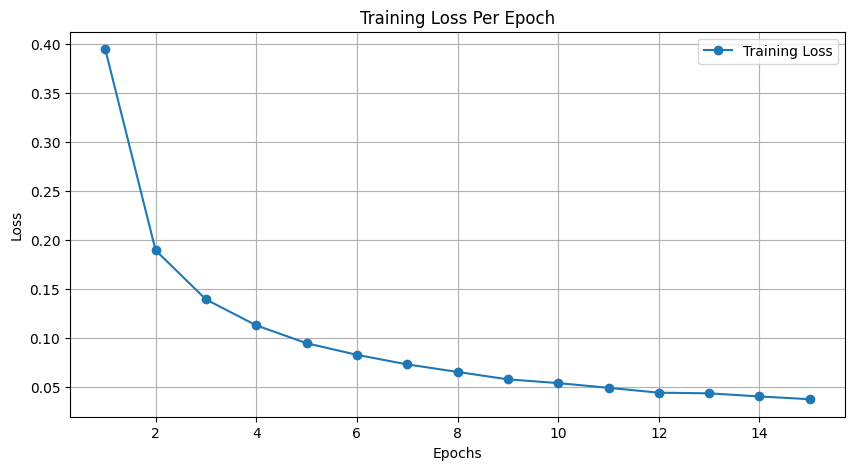

In [5]:
import matplotlib.pyplot as plt

model = MNISTNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []
for epoch in range(15):
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plotting the training loss
plt.figure(figsize=(15, 5))
plt.plot(range(1, 16), losses, marker='o', label='Training Loss')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


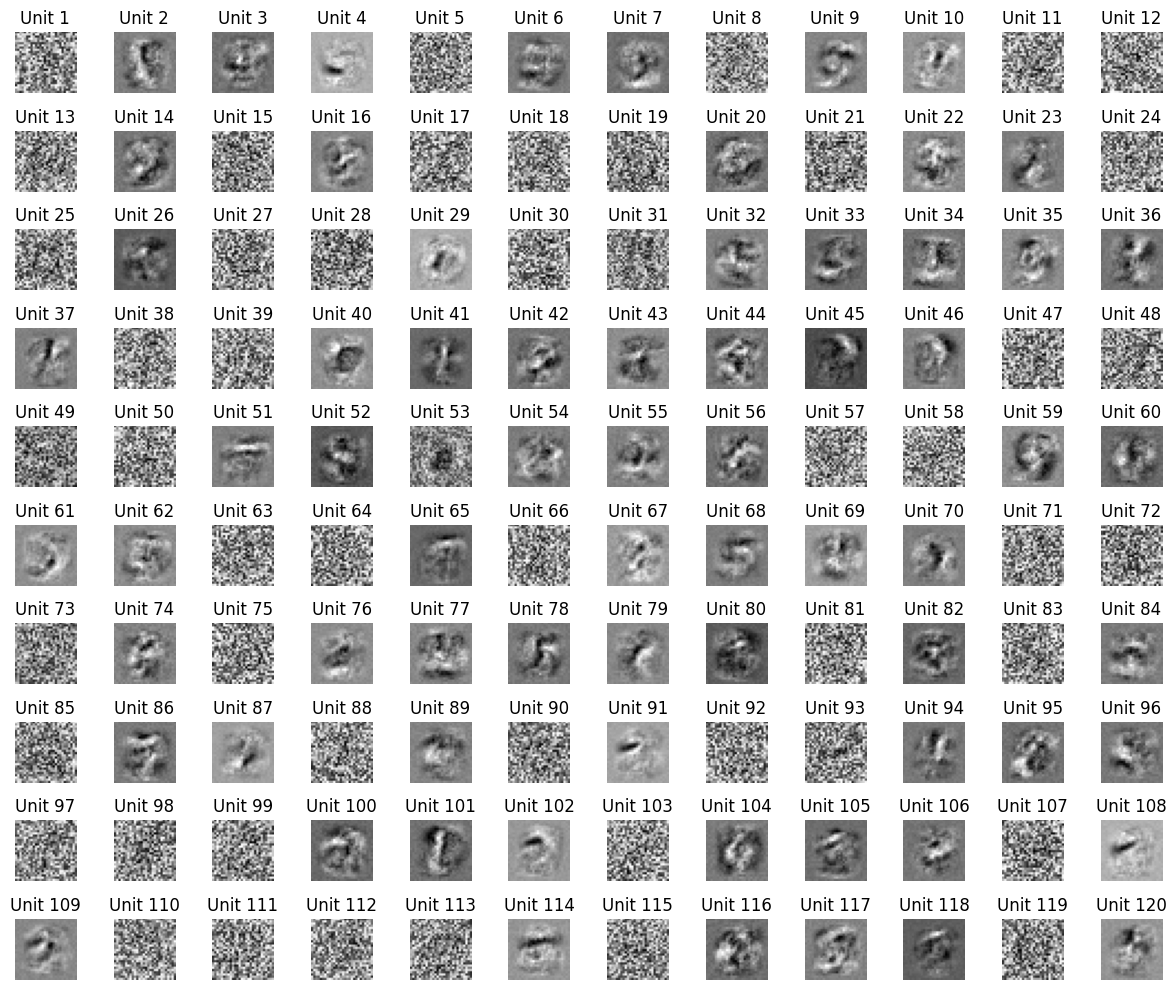

In [8]:
with torch.no_grad():
    weights = model.layer1.weight.data.view(-1, 28, 28).cpu()

fig, ax = plt.subplots(10, 12, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    if i < weights.shape[0]:
        axi.imshow(weights[i], cmap='gray')
        axi.set_title(f'Unit {i+1}')
    axi.axis('off')
plt.tight_layout()
plt.show()
